# How to change hitmaps

Hitmaps are NSIDE dependent, so having a script that generates your chosen hitmap at any given NSIDE is optimal. 

If this is the case, changing the hitmap used is quite simple. 

If you wish to simply change the hitmap being used for the CCAT channels already present in this version of the package, then go to $\rightarrow$ ccat_mapsims/ccat_models/make_ccat_hitmap.py and change the default argument 'fn' of the function make_hitmap_ccat:
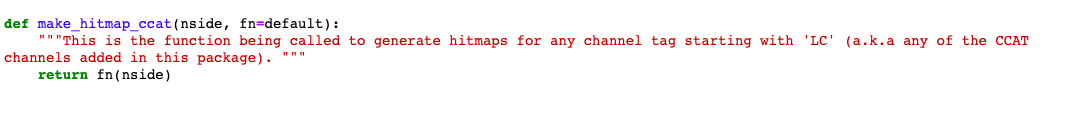

Note that fn is just a pointer to the function generating the hitmap, so if you have another function you wish to use instead, just replace the 'fn=default' to 'fn=desired_function.' 

This will change the hitmap for channels with tag starting with the letters "LC". 

If you do NOT have a function to generate your hitmaps for any given NSIDE, I wrote a function that roughly translates maps of nside1 to any nside2. See an example below:

In [1]:
import sys
(sys.path).insert(1,'/Users/pedroguicardi/Desktop/CMB_Analysis/MAPSIMS/directories')
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import healpy as hp
from pixell import enmap, enplot, reproject, utils, curvedsky
from astropy.io import fits
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import matplotlib.pyplot as plt
import matplotlib as mpl
from ad_fns import *
from ccat_models import ccat_noise as CCAT_noise
import scipy.optimize as op

Any map can be loaded:

/home/pfg44/.local/lib/python3.6/site-packages/healpy/visufunc.py:329: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pylab.draw()
/home/pfg44/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


NSIDE: 512


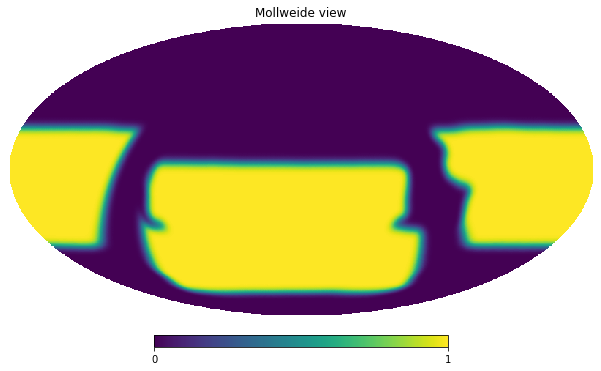

In [2]:
m = hp.read_map("hitmaps/SO_LA_apo_mask_nside512_cut_b10_200611.fits")
hp.mollview(m)
print("NSIDE: " + str(hp.npix2nside(m.shape[-1])))

We can then lower its NSIDE with the function rough_change_nside and subsequently bring it back to its original resolution. 

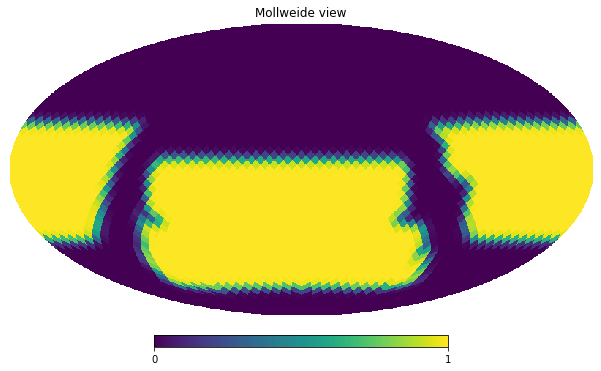

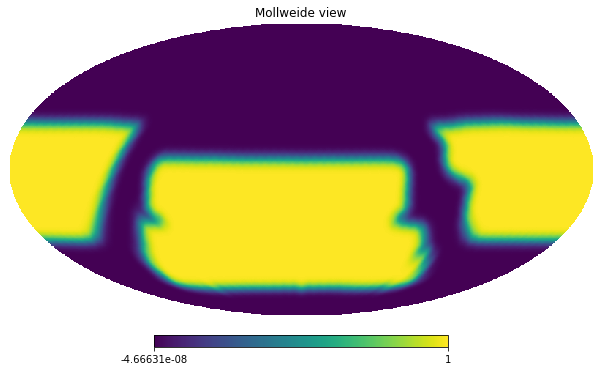

In [3]:
m_16 = rough_change_nside(m, 16)
hp.mollview(m_16)
m_recovered = rough_change_nside(m_16, 512)
hp.mollview(m_recovered)

We can also raise the original map to any higher NSIDE:

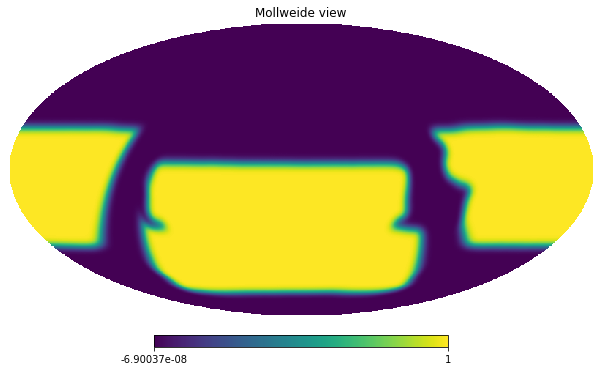

In [4]:
m_2048 = rough_change_nside(m, 2048)
hp.mollview(m_2048)

So, you can simply substitute the default function for make_hitmap_ccat on ccat_mapsims/ccat_models/make_ccat_hitmap.py by one that changes the nside of any hitmap already computed at a specific nside. 